In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
df.head();
print(df.shape)

(10000, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(8,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 96        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3345 - val_loss: 0.3286
Epoch 2/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3342 - val_loss: 0.3291
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3340 - val_loss: 0.3302
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3339 - val_loss: 0.3292
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3339 - val_loss: 0.3299
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3336 - val_loss: 0.3309
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3337 - val_loss: 0.3306
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3335 - val_loss: 0.3309
Epoch 9/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3336 - val_loss: 0.3308
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3335 - val_lo

In [ ]:
model.layers[0].get_weights()

[array([[-0.01584578,  0.14985359,  0.00662417,  0.07463064,  0.27439255,
          0.00399028,  0.10899597,  0.06546241],
        [-1.2676255 , -0.7649664 , -0.36733726, -0.51534694, -0.50830925,
         -0.2982739 , -0.32299218,  0.3333443 ],
        [ 0.06174644, -0.37947738, -0.13101934,  0.10186141,  0.39012074,
         -0.18287656,  0.24774194,  0.1704188 ],
        [ 0.0754678 ,  0.15467328,  0.08277561,  0.06644288, -0.5969663 ,
          1.1183561 , -1.0659757 , -0.08069807],
        [ 0.00535727,  0.19612965, -1.4188043 ,  1.219833  ,  0.04430541,
          1.3779514 , -1.6216345 ,  0.08339334],
        [-0.06912781, -0.20427766, -0.2916155 , -0.32747486, -0.06263154,
          0.1827261 , -0.0231198 ,  0.02761926],
        [-0.34779435, -0.4083803 , -0.29530618,  0.12313165, -0.51158834,
         -0.06690469,  0.35048887,  1.4998586 ],
        [-0.06498081,  0.11779726,  0.20189671,  0.03037232, -0.11596002,
         -0.09770745, -0.22622167,  0.05113007],
        [ 0.0341

In [ ]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.866

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'loss': [0.3344786763191223,
  0.3342152535915375,
  0.3339555859565735,
  0.33391010761260986,
  0.33393821120262146,
  0.3336091637611389,
  0.3337495028972626,
  0.3335179090499878,
  0.3336281478404999,
  0.33350497484207153,
  0.33366164565086365,
  0.333304226398468,
  0.3334335386753082,
  0.33345451951026917,
  0.3334568738937378,
  0.3333970010280609,
  0.33332985639572144,
  0.33338463306427,
  0.3331860601902008,
  0.3331466615200043,
  0.3333967626094818,
  0.33333760499954224,
  0.3334118127822876,
  0.33342111110687256,
  0.33304718136787415,
  0.3330417573451996,
  0.3330445885658264,
  0.3330071270465851,
  0.3331491947174072,
  0.3329368233680725,
  0.33298954367637634,
  0.3328745663166046,
  0.3331836760044098,
  0.33287814259529114,
  0.3329344689846039,
  0.3328620195388794,
  0.3328871428966522,
  0.33301079273223877,
  0.33275124430656433,
  0.33307376503944397,
  0.3327200412750244,
  0.332570880651474,
  0.33271417021751404,
  0.332620769739151,
  0.3327146172

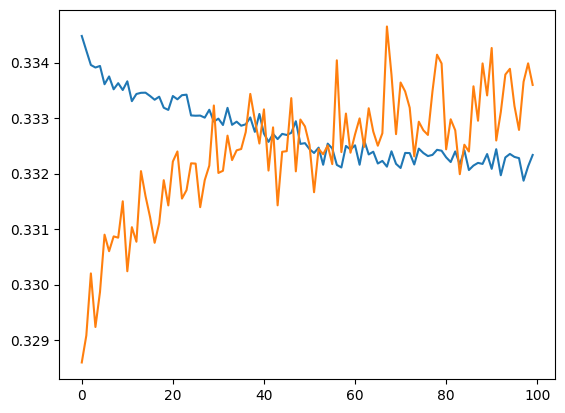

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])